In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

from load_results import load_setup_1, load_setup_2, PARAM_COLUMNS, RESULT_COLUMNS, FITNESS_FUNCTIONS

%matplotlib inline

In [10]:
df = load_setup_2()
df.head()

,fitness_function,use_constraint,constraint_handling_method,constraint,particle_speed_limit,population_size,personal_confidence,swarm_confidence,particle_inertia,constraint_r,fitness,optimum,iterations,optimum_reached,iterations_to_opt
0,Booth's function,False,-,-,2,5,0.8,1.6,0.3,-,0.989484,1.0,500.0,0.0,57.1
1,Booth's function,False,-,-,2,10,0.8,1.6,0.3,-,0.997519,1.0,500.0,0.0,43.1
2,Booth's function,False,-,-,2,35,0.8,1.6,0.3,-,0.999904,1.0,500.0,0.0,35.4
3,Booth's function,False,-,-,2,80,0.8,1.6,0.3,-,0.999979,1.0,500.0,0.2,21.6
4,Booth's function,False,-,-,10,5,0.8,1.6,0.3,-,0.992255,1.0,500.0,0.0,17.4


In [11]:
# inspect values in Experiment setup
for column in PARAM_COLUMNS:
    print(f'{column}: {df[column].unique()}')

fitness_function: ["Booth's function" 'Schwefel function' 'Shubert function']
use_constraint: [False]
constraint_handling_method: ['-']
constraint: ['-']
particle_speed_limit: [ 2 10 19]
population_size: [ 5 10 35 80]
personal_confidence: [0.8]
swarm_confidence: [1.6]
particle_inertia: [0.3]
constraint_r: ['-']


# Evaluation 

## Particle Speed Limit

### Background 

* prevent velocity to explode -> resets velocity when exceeds speed limit reached to previous valid velocity
* keeps direction, but reset magnitude
* High values of |V|max cause global exploration whereas lower ones improves local fine tuning

* we tested values of 2, 10 and 19 -> refere to them as low medium and high


### Hypothesis

* A small speed limit decreases convergence rate but increases success changes for convergence
* less global exploration better local exploration for lower values
* high values problem of finding optimum (jump over opimum)

In [12]:
df.groupby(['fitness_function', 'particle_speed_limit'])[RESULT_COLUMNS].mean()

fitness  optimum_reached  \
fitness_function  particle_speed_limit                              
Booth's function  2                     0.996722            0.050   
                  10                    0.997793            0.575   
                  19                    0.999268            0.700   
Schwefel function 2                     0.927781            0.350   
                  10                    0.931874            0.525   
                  19                    0.938048            0.575   
Shubert function  2                     0.889164            0.550   
                  10                    0.898998            0.625   
                  19                    0.873219            0.550   

                                        iterations_to_opt  
fitness_function  particle_speed_limit                     
Booth's function  2                                39.300  
                  10                               11.750  
                  19                               10.275  
Schwefel function 2                               179.325  
                  10                               56.975  
                  19                               54.500  
Shubert function  2                                59.475  
                  10                               11.725  
                  19                               15.325

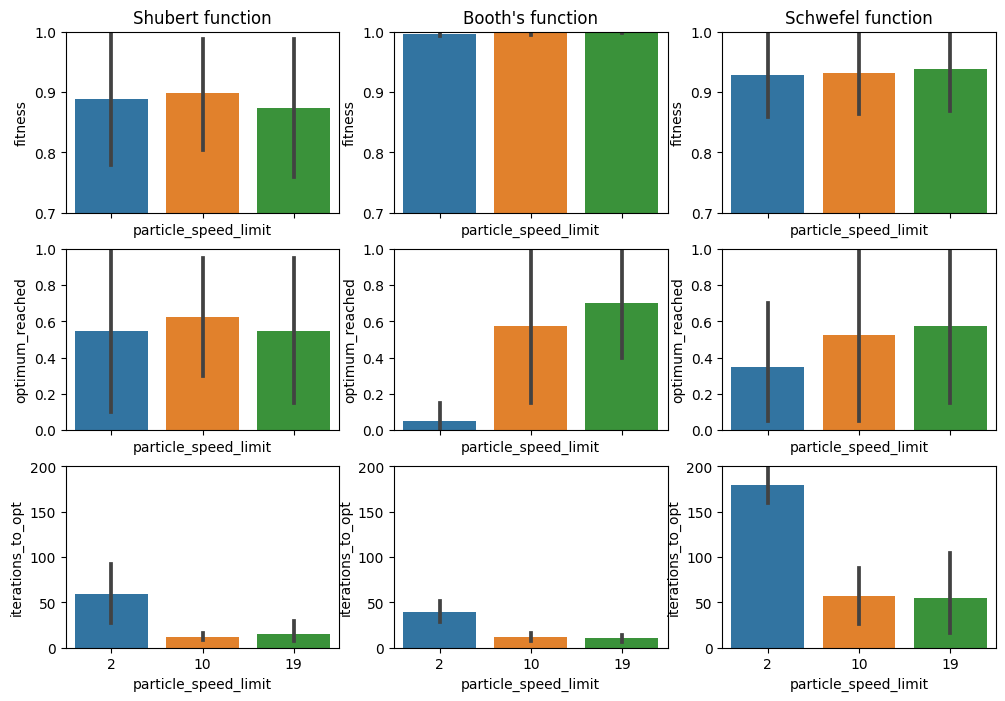

In [13]:
df_speed = df.reset_index()
figure, axes = plt.subplots(3, 3, figsize=(12, 8), sharex=True)
for result_column, axe in zip(RESULT_COLUMNS, axes):
    for fitness_function, ax in zip(FITNESS_FUNCTIONS, axe):
        sns.barplot(
            data=df_speed[df_speed.fitness_function == fitness_function],
            x='particle_speed_limit',
            y=result_column,
            ax=ax)
for ax, fitness_function in zip(axes[0], FITNESS_FUNCTIONS):
    ax.set_ylim(0.7, 1.0)
    ax.set_title(fitness_function)
for ax in axes[1]:
    ax.set_ylim(0.0, 1.0)
for ax in axes[2]:
    ax.set_ylim(0, 200)

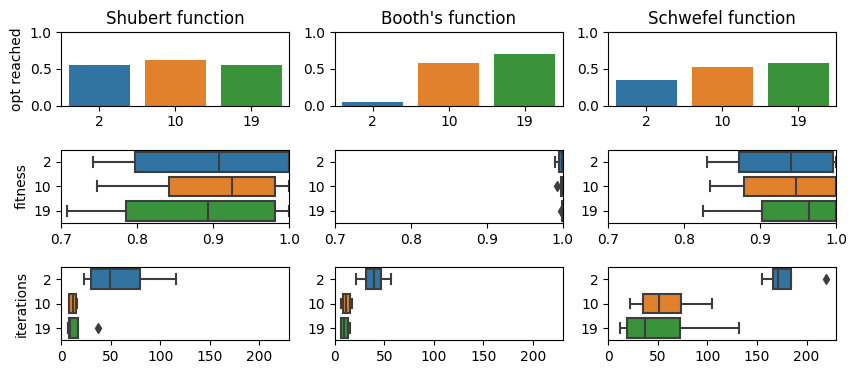

In [46]:
figure, axes = plt.subplots(3, 3, figsize=(10, 4))
plt.subplots_adjust(hspace = 0.6)
for i, fitness_function in enumerate(FITNESS_FUNCTIONS):
    data = df_speed[df_speed.fitness_function == fitness_function]
    ax = axes[0][i]
    sns.barplot(
        data=data,
        x='particle_speed_limit',
        y='optimum_reached',
        errorbar=None,
        ax=ax)
    ax.set_ylim(0.0, 1.0)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_title(fitness_function)

    ax = axes[1][i]
    sns.boxplot(
        data=data,
        x='fitness',
        y='particle_speed_limit',
        orient='h',
        ax=ax)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.set_xlim(0.7, 1.0)
    
    ax = axes[2][i]
    sns.boxplot(
        data=data,
        x='iterations_to_opt',
        y='particle_speed_limit',
        orient='h',
        ax=ax)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.set_xlim(0, 230)
axes[0][0].set_ylabel('opt reached')
axes[1][0].set_ylabel('fitness')
axes[2][0].set_ylabel('iterations')
plt.savefig('./plots/compare_speed_limit')

## Shubert function

* medium best 
* we see significant higher iterations for small speed limit but better solution found 
* high speed limit worst at finding optimum

## Booth's function 

* not exaclty able to explain why low speed limit leads to less possibility of finding optimum
* tried it on NetLogo and it seems with a speed limit of 2 turtles jump over the optimum "endlessly" 
* therefore the optimum is almost as good as the others but never exactly reached 

## Schwefel function

* few differenecs in finding optimum
* number of iterations exploads for small speed limit 

## General

* balanced speed limit seems to be the best option for all functions 
* convergance rate solwer for lower speed limit 
* solutions not better in our case -> higher speed limit better fittness


<AxesSubplot: xlabel='fitness', ylabel='fitness_function'>

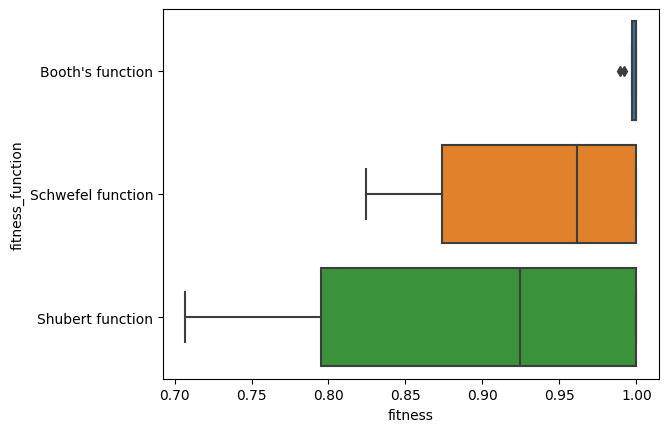

In [6]:
sns.boxplot(data=df, x='fitness', y='fitness_function')

<AxesSubplot: xlabel='iterations_to_opt', ylabel='fitness_function'>

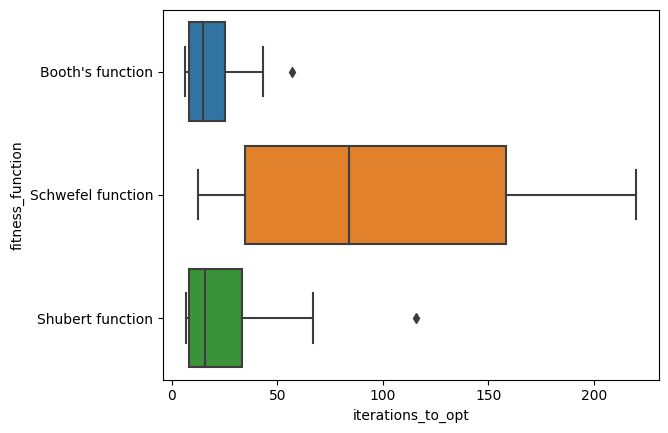

In [7]:
sns.boxplot(data=df, x='iterations_to_opt', y='fitness_function')

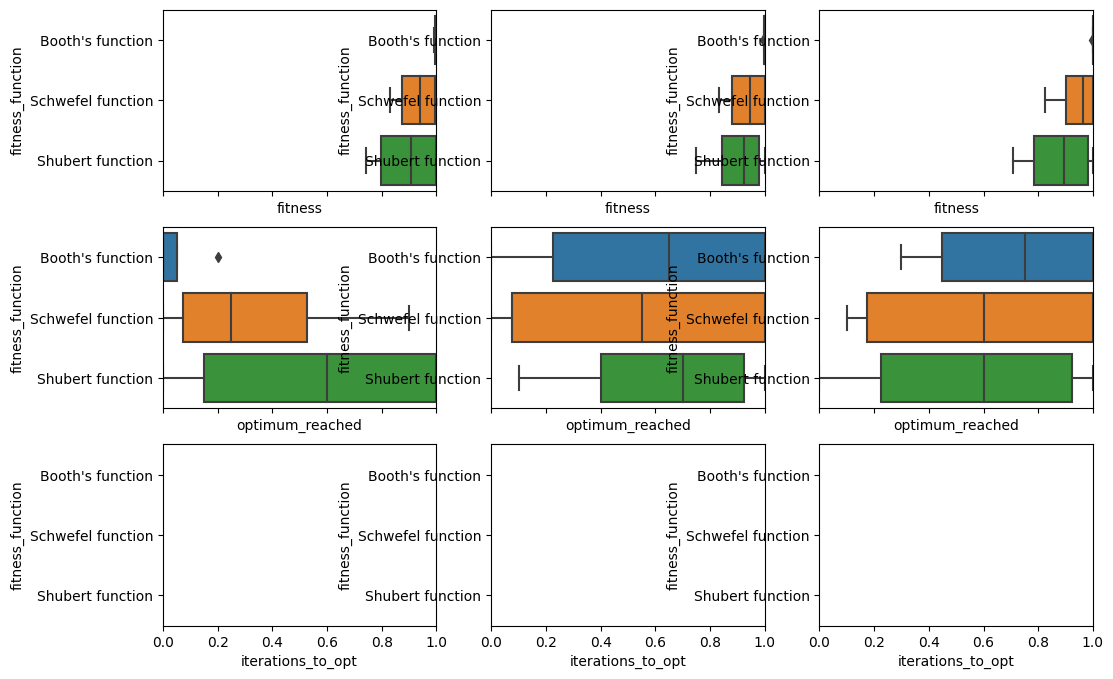

In [8]:
df_speed = df.reset_index()
figure, axes = plt.subplots(3, 3, figsize=(12, 8), sharex=True)
psl_options = df_speed.particle_speed_limit.unique()
for i, psl in enumerate(psl_options):
    sns.boxplot(
        data=df_speed[df_speed.particle_speed_limit == psl],
        x='fitness',
        y='fitness_function',
        ax=axes[0][i])
    axes[0][i].set_xlim(0.7, 1.0)
    sns.boxplot(
        data=df_speed[df_speed.particle_speed_limit == psl],
        x='optimum_reached',
        y='fitness_function',
        ax=axes[1][i])
    axes[1][i].set_xlim(0.0, 1.0)
    sns.boxplot(
        data=df_speed[df_speed.particle_speed_limit == psl],
        x='iterations_to_opt',
        y='fitness_function',
        ax=axes[2][i])